In [1]:
import pandas as pd
import matplotlib as plt


In [2]:
df = pd.read_csv('/content/dataset2.xls')
df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,141.973080
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
df.describe(include=['object'])

,sex
count,10000
unique,4
top,F
freq,4755


In [ ]:
print("sex column unique values:")
print(pd.Series(df.sex.unique()), end='\n\n')

sex column unique values:
0         M
1         F
2      male
3    female
dtype: object



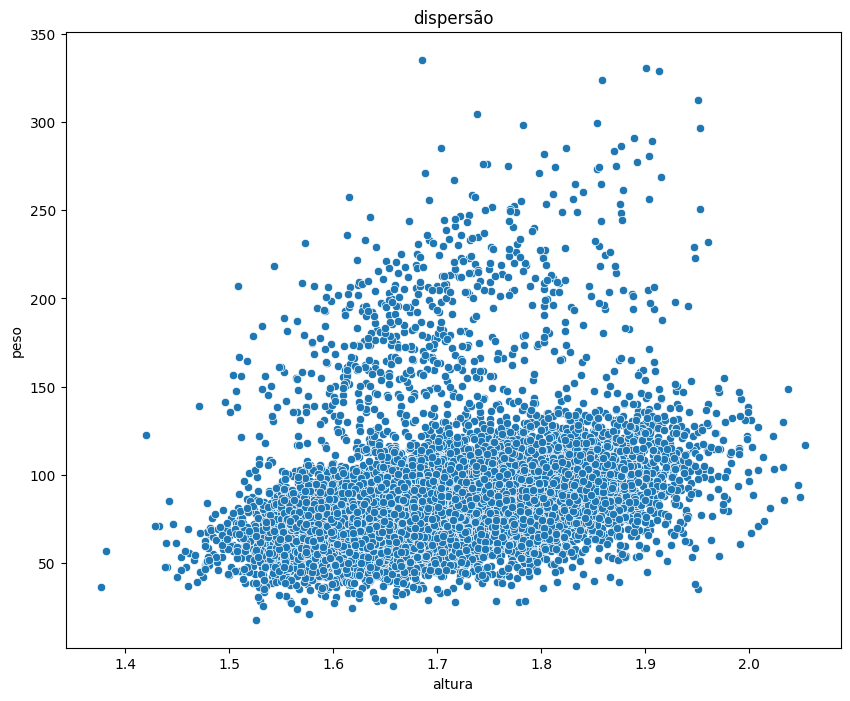

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
sns.scatterplot(x=df["height"], y=df["weight"])
plt.xlabel("altura")
plt.ylabel("peso")
plt.title("dispersão")
plt.show()

CONSIDERAÇÕES A RESPEITO DO GRÁFICO: Podemos notar alguns pontos no gráfico que estão mais distantes da tendência principal, tanto em relação a altura quanto ao peso. Esses pontos podem representar valores extremos ou outliers, que são observações incomuns que se desviam significativamente do padrão.

QUESTÃO 'B' A SEGUIR: Identificou-se que, no processo de integração entre 2 conjuntos de dados distintos, gerou-se uma inconsistência em 2 features de nosso dataset. Identifique-as e corrija esses problemas.

In [ ]:
# Substitui "m" por "male".
df["sex"].replace("M", "male", inplace=True)

# Substitui "f" e "female".
df["sex"].replace("F", "female", inplace=True)

In [ ]:
print("SEX column unique values:")
print(pd.Series(df.sex.unique()))

SEX column unique values:
0      male
1    female
dtype: object


In [ ]:
df.head(1)

,sex,age,height,weight
0,male,62,1.874021,114.384199


QUESTÃO 'C': Crie uma nova coluna, IMC, a partir das colunas de peso e altura.

In [ ]:
#criando uma nova coluna do dataset, o IMC


df['IMC'] = df['weight'] / (df['height'] ** 2)
df

,sex,age,height,weight,IMC
0,male,62,1.874021,114.384199,32.569938
1,female,44,1.672676,76.031332,27.174950
2,female,49,1.587970,46.403086,18.401889
3,female,25,1.653451,104.352744,38.169932
4,male,65,1.744867,76.831890,25.235778
...,...,...,...,...,...
9995,male,68,1.999051,135.605141,33.933486
9996,female,33,1.601821,141.973080,55.332206
9997,male,25,1.926656,131.105269,35.319260
9998,female,32,1.844436,62.475271,18.364586


QUESTÃO 'D': Explique a diferença de outliers uni e multivariados. Utilize a coluna IMC para identificar outliers em nosso conjunto de dados. Estabeleça um critério lógico e, a partir desse critério, remova os outliers que julgar cabível. Nesse contexto, seriam esses outliers uni ou multivariados?

**RESPOSTA:**
Outliers uni e multivariados são distintos pois, enquanto o primeiro significa que alguns dados variam no que tange a uma única variável, podendo ser identificado em uma plotagem de gráfico, por exemplo, os outliers multivariados tem um desvio padrão no que tange várias variáveis simultanenamente.
Quanto aos outliers que serão retirados do DataFrame da questão proposta pelo Feitosa, faremos a retirada a partir do critério: (No caso do exercício, seriam outliers univariados.)

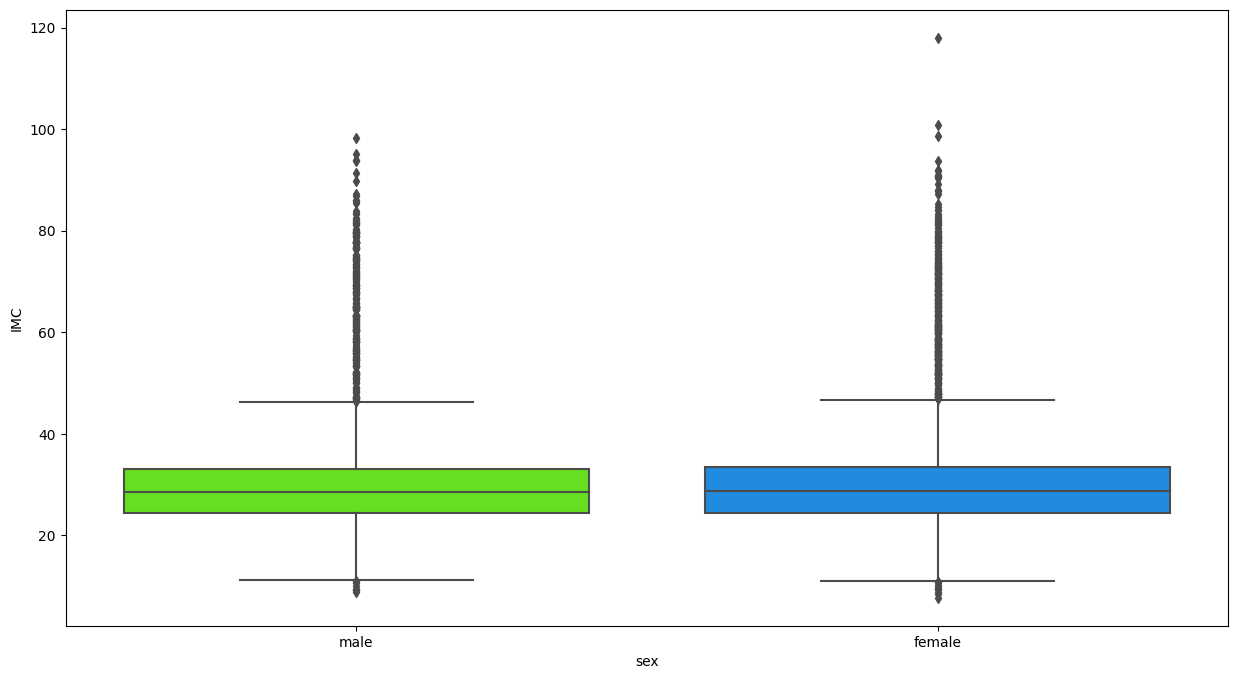

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x='sex', y = 'IMC', data=df, palette = "gist_rainbow")
plt.show()


In [ ]:
df.describe()
#Cabe esclarecer que um IMC de 117 é meio incomensurável, com a plotagem anterior é notido a existencia de outliers, e usando o critério de que valores de IMC superiores a 80 serão desconsiderados (levando em consideração que a obsidade morbida é notada a partir do 40, dobrando assim a margem de modo que seja equivalente com o valor minino (7.7) que corresponde a quase metade do indice de magreza extrema.)

,age,height,weight,IMC
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,88.910496,30.349851
std,16.425919,0.099272,33.328269,10.822243
min,14.000000,1.376462,17.970189,7.715833
25%,28.000000,1.636008,69.394196,24.389122
50%,42.000000,1.702588,83.518259,28.626742
75%,57.000000,1.776343,99.050654,33.259582
max,70.000000,2.054139,335.295817,117.990575


In [ ]:
df = df[df['IMC'] <= 80]

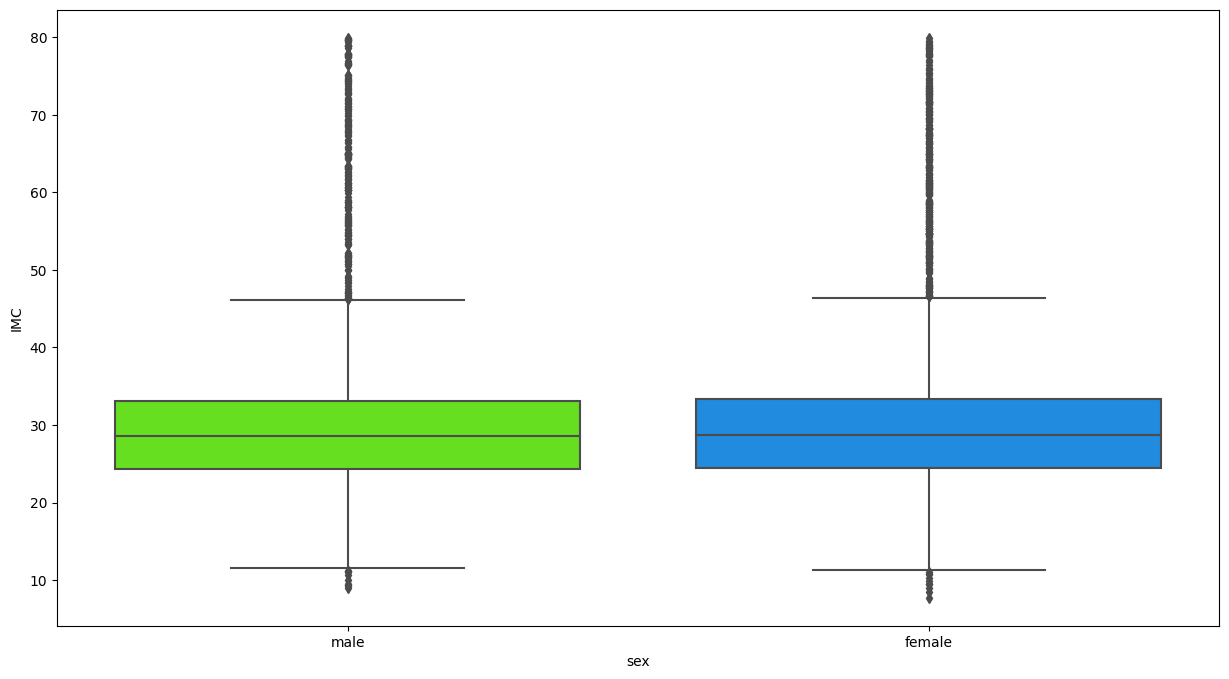

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x='sex', y = 'IMC', data=df, palette = "gist_rainbow")
plt.show()

QUESTÃO 'E': Qual a porcentagem da população poderia se enquadrar fora da condição “saudável” de peso (com base no IMC)? Siga a tabela a seguir.

In [ ]:
m_saudáveis = df.loc[ df['IMC'] > 24.9 ]
m_saudáveis


,sex,age,height,weight,IMC
0,male,62,1.874021,114.384199,32.569938
1,female,44,1.672676,76.031332,27.174950
3,female,25,1.653451,104.352744,38.169932
4,male,65,1.744867,76.831890,25.235778
5,female,57,1.604690,79.076932,30.709119
...,...,...,...,...,...
9994,female,44,1.629277,83.618157,31.500005
9995,male,68,1.999051,135.605141,33.933486
9996,female,33,1.601821,141.973080,55.332206
9997,male,25,1.926656,131.105269,35.319260


In [ ]:
nm_saudaveis = df.loc[df['IMC'] < 18.5]
nm_saudaveis

,sex,age,height,weight,IMC
2,female,49,1.587970,46.403086,18.401889
35,male,68,1.684478,37.488041,13.211796
60,female,20,1.659444,41.441387,15.049049
74,male,27,1.597032,46.164596,18.100131
91,female,26,1.778638,28.241507,8.927144
...,...,...,...,...,...
9887,female,58,1.743292,43.312592,14.251929
9888,female,35,1.780246,52.738499,16.640553
9925,female,55,1.590381,46.242436,18.282619
9966,female,18,1.634298,40.249891,15.069614


In [ ]:
df

,sex,age,height,weight,IMC
0,male,62,1.874021,114.384199,32.569938
1,female,44,1.672676,76.031332,27.174950
2,female,49,1.587970,46.403086,18.401889
3,female,25,1.653451,104.352744,38.169932
4,male,65,1.744867,76.831890,25.235778
...,...,...,...,...,...
9995,male,68,1.999051,135.605141,33.933486
9996,female,33,1.601821,141.973080,55.332206
9997,male,25,1.926656,131.105269,35.319260
9998,female,32,1.844436,62.475271,18.364586


O TOTAL DE 'COLUNAS' COM INFORMAÇÃO DE CIDADÃOS DA CIDADE DO TURING SE SOMA EM 9945 PESSOAS. CONSIDERANDO QUE 7.706 PESSOAS, AO TOTAL, ESTÃO FORAM DA LINHA DE 'SAUDÁVEL' CONSIDERADA PELA TABELA DE IMC, TEMOS UM TOTAL PERCENTUAL DE, APROXIMADAMENTE, 77,49% DA POPULAÇÃO.

QUESTÃO 'F': Trace gráficos do tipo violino (violinplot) da altura e do peso em função do sexo e analise-os.

Text(0.5, 1.0, 'Gráfico Violino - Altura por Sexo')

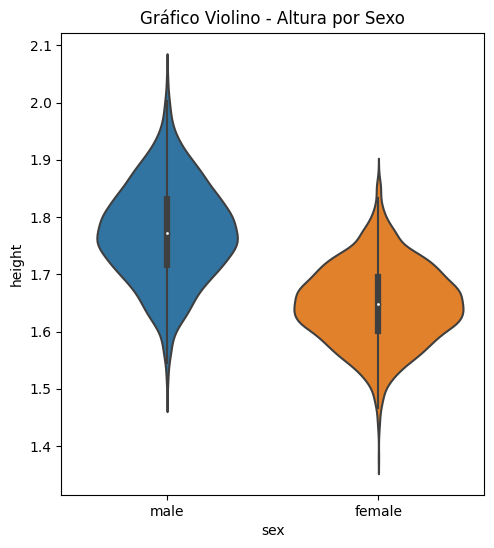

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='sex', y='height', data=df)
plt.title('Gráfico Violino - Altura por Sexo')

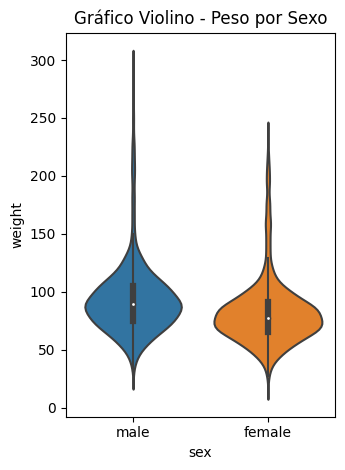

In [ ]:
plt.subplot(1, 2, 2)
sns.violinplot(x='sex', y='weight', data=df)
plt.title('Gráfico Violino - Peso por Sexo')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


ANÁLISE AQUI: É possível notar que o gráfico de altura em função do sexo tem mais variação do que o de peso em relação ao sexo. O que pode indentificar que, por mais que haja diferença quanto ao peso, com o sexo masculino tendo valores um pouco mais elevados do que os referentes ao sexo feminino, ainda é uma variação mais suave do que o gráfico com a variável de altura, no qual o genêro masculino se encontra com valores maiores.
Ademais, a maioria das mulheres encontram-se na media de 1.6 e 1.7 de altura. Enquanto os homens tem a média por volta de 1.7 e 1.8.
Quanto ao peso, a média feminia e masculina fica entre 50 e 100 kg.